In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

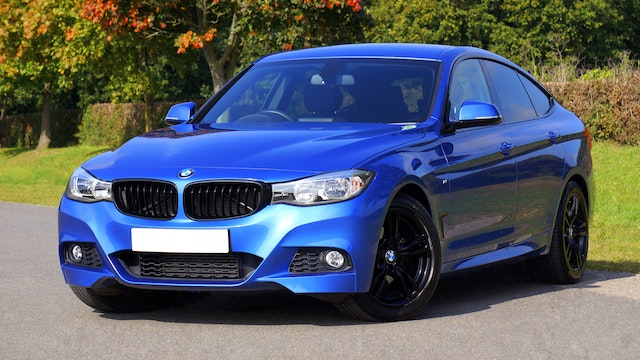

In [2]:
img = Image.open('car.jpg')

img

In [3]:
transforms = T.Compose([
    T.Resize(450),
    T.ToTensor()
])

In [5]:
img_tensor = transforms(img)

img_tensor

print("")

img_tensor.shape

torch.Size([3, 450, 800])

In [8]:
img_tensor = img_tensor.unsqueeze(0)

img_tensor.shape

torch.Size([1, 3, 450, 800])

In [12]:
sharpen_kernel = [[[[0, -1, 0]],
                   [[-1, 5, -1]],
                   [[0, -1, 0]]]]

In [13]:
sharpen_filter = torch.Tensor(sharpen_kernel)

sharpen_filter.shape

torch.Size([1, 3, 1, 3])

In [14]:
conv_tensor = F.conv2d(img_tensor, sharpen_filter, padding = 0)

conv_tensor.shape

torch.Size([1, 1, 450, 798])

In [15]:
conv_img = conv_tensor[0, :, :, :]

conv_img.shape

torch.Size([1, 450, 798])

In [17]:
conv_img = conv_img.numpy().squeeze()

conv_img.shape

(450, 798)

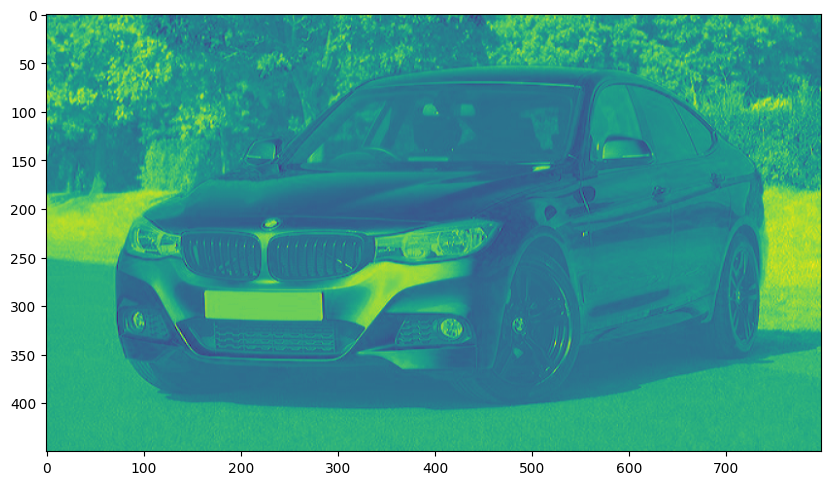

In [18]:
plt.figure(figsize = (10, 10))
plt.imshow(conv_img)

In [19]:
pool = nn.MaxPool2d(2, 2)

pool

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

In [20]:
pool_tensor = pool(conv_tensor)

pool_tensor.shape

torch.Size([1, 1, 225, 399])

In [21]:
pool_img = pool_tensor[0, :, :, :]

pool_img.shape

torch.Size([1, 225, 399])

In [22]:
pool_img = pool_img.numpy().squeeze()

pool_img.shape

(225, 399)

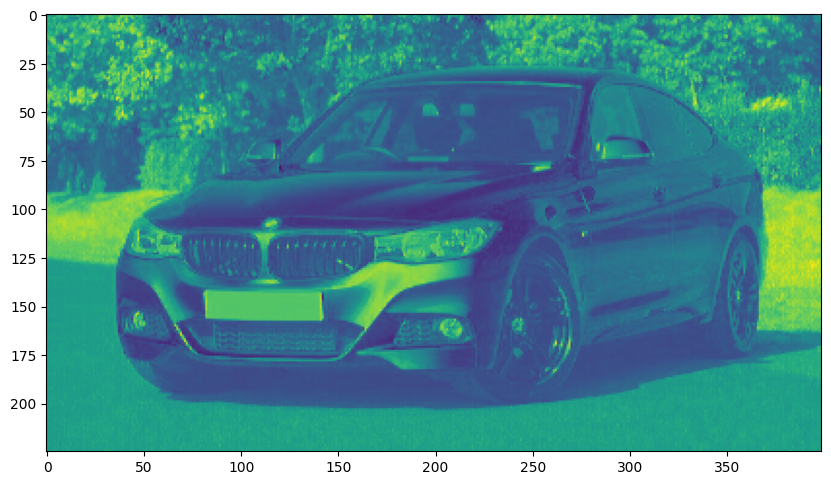

In [23]:
plt.figure(figsize = (10, 10))
plt.imshow(pool_img)

In [28]:
def apply_kernel_and_show(img_kernel, kernel):
  filter = torch.tensor(kernel, dtype=torch.float32)

  conv_tensor = F.conv2d(img_tensor, filter, padding = 0)

  conv_img = conv_tensor[0, :, :, :]
  conv_img = conv_img.numpy().squeeze()

  pool = nn.MaxPool2d(2, 2)
  pool_tensor = pool(conv_tensor)

  pool_img = pool_tensor[0, :, :, :]
  pool_img = pool_img.numpy().squeeze()

  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(16, 6)

  fig.suptitle('Convolution output and Pooling output')

  ax1.imshow(conv_img)
  ax2.imshow(pool_img)

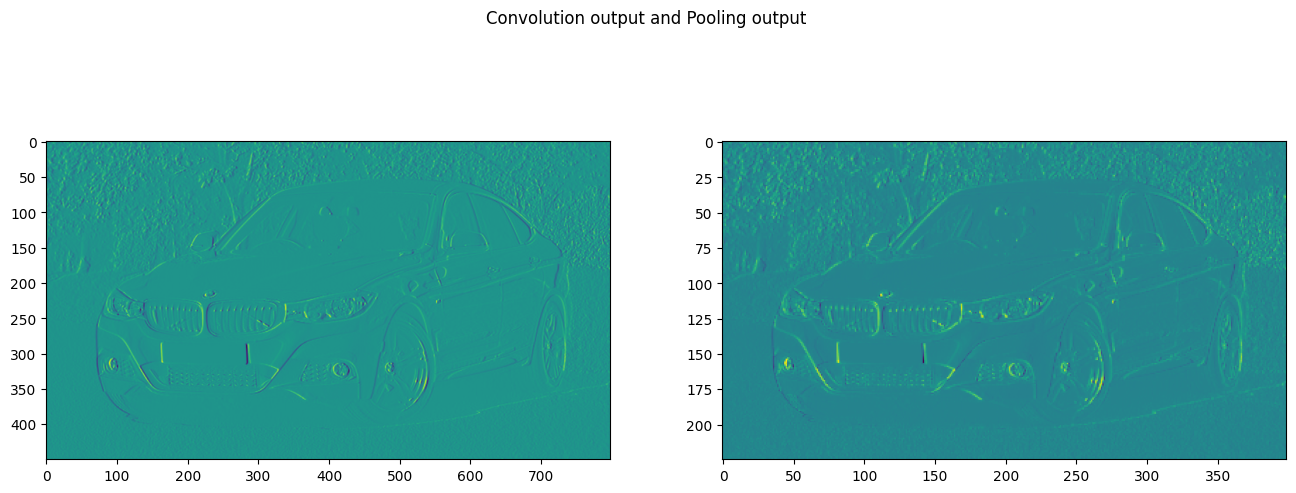

In [29]:
vertical_edge_kernel = [[[[-1, 0, 1]],
                         [[-1, 0, 1]],
                         [[-1, 0, 1]]]]

apply_kernel_and_show(img_tensor, vertical_edge_kernel)

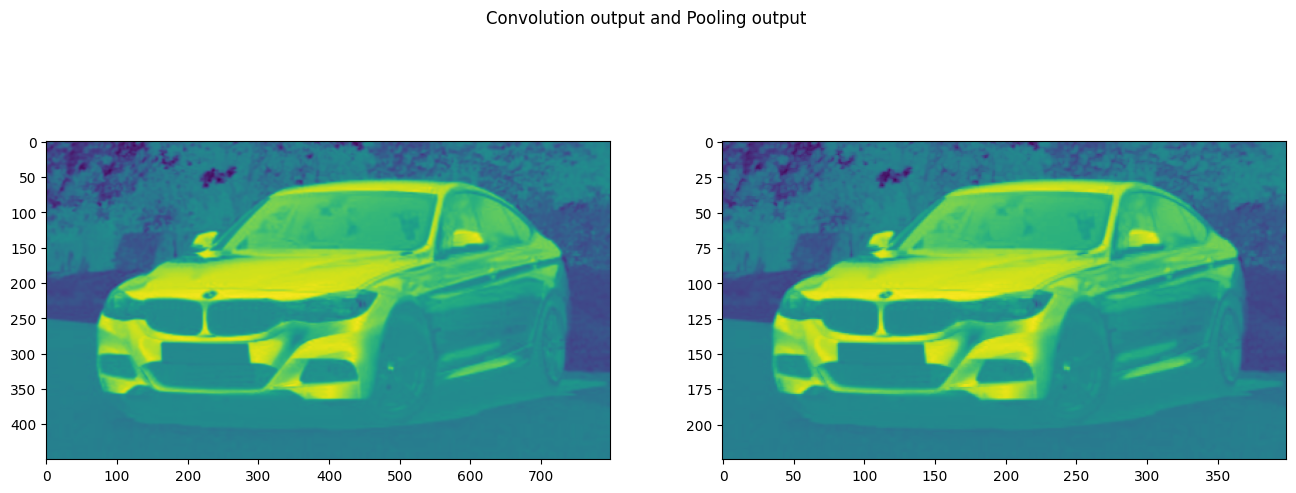

In [30]:
horizontal_edge_kernel = [[[[-1, -1, -1]],
                           [[0, 0, 0]],
                           [[1, 1, 1]]]]

apply_kernel_and_show(img_tensor, horizontal_edge_kernel)

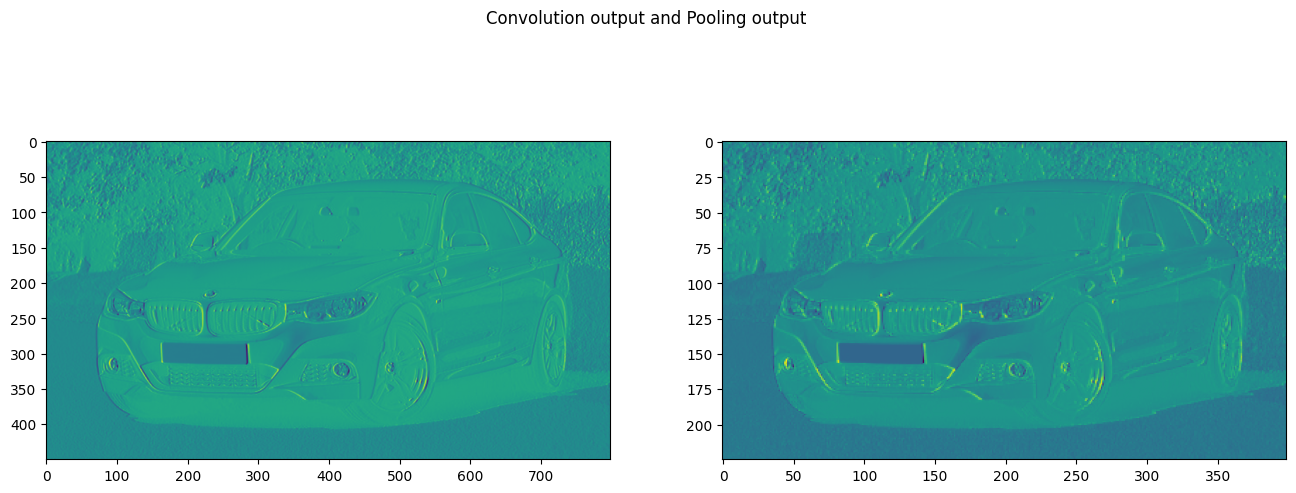

In [32]:
sobel_edge_kernel = [[[[-1, 0, 0]],
                      [[-2, 0, 2]],
                     [[-1, 0, 1]]]]

apply_kernel_and_show(img_tensor, sobel_edge_kernel)

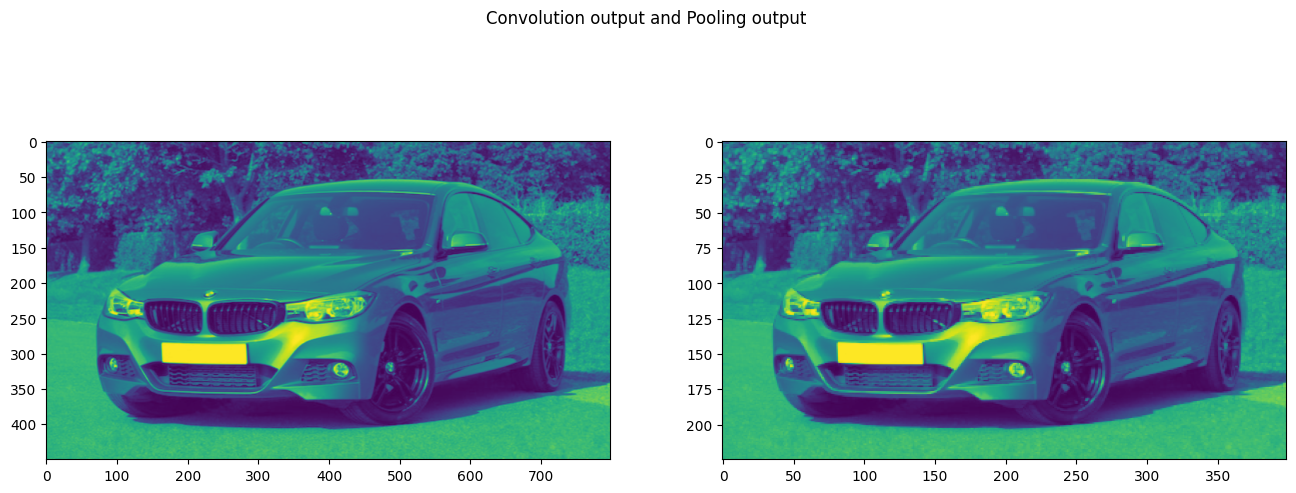

In [33]:
gaussain_blur_kernel = [[[[1/16, 1/8, 1/16]],
                         [[1/8, 1/4, 1/8]],
                         [[1/16, 1/8, 1/16]]]]

apply_kernel_and_show(img_tensor, gaussain_blur_kernel)

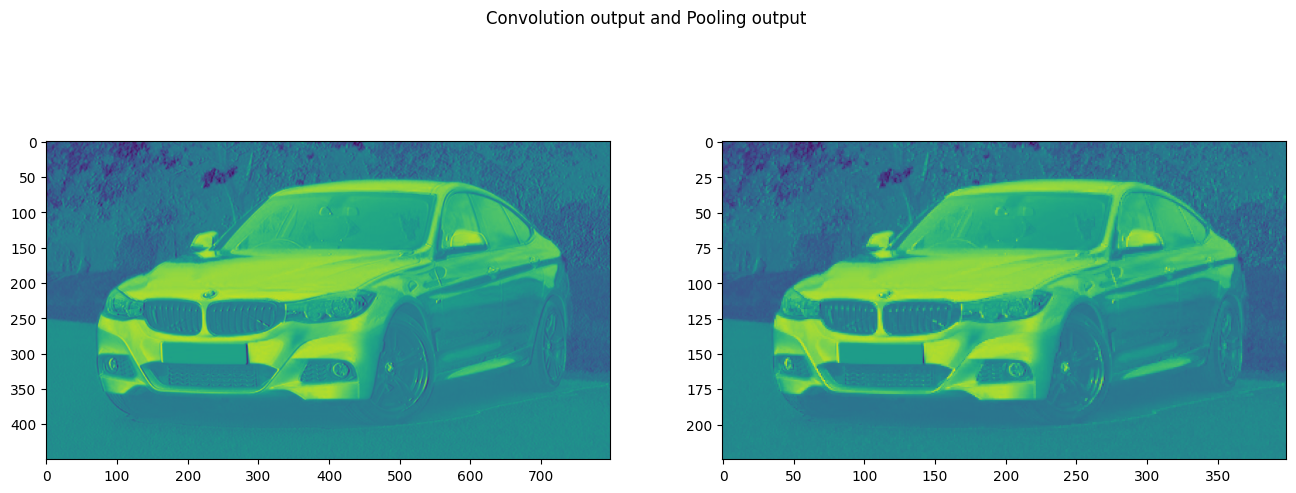

In [34]:
emboss_kernel = [[[[-2, -1, 0]],
                  [[-1, 1, 1]],
                  [[0, 1, 2]]]]

apply_kernel_and_show(img_tensor, emboss_kernel)